In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [2]:
happiness_df = pd.read_csv('../Resources/Gallup2018.csv')
nationalparks_df = pd.read_csv('../Resources/StatesRanked_NationalParkCoverage.csv')

In [3]:
happiness_df.head()

,State,2018 sample size,Well-Being Index,Well-Being Index Rank,Career,Social,Financial,Community,Physical
0,Hawaii,502,64.6,1,1,1,1,4,4
1,Wyoming,219,64.2,2,3,18,6,1,3
2,Alaska,212,63.9,3,5,8,2,23,1
3,Montana,488,63.5,4,4,19,17,2,7
4,Utah,1214,63.4,5,2,4,13,9,14


In [4]:
# Checking Columns
# print(happiness_df.columns.tolist())

In [5]:
nationalparks_df.head()

,STATE,Rank,State Size (acres),Number of State Parks,# of State Parks (acres),State Coverage of State Parks,Number of National Parks,State Coverage of National Parks (acres),State Coverage of National Parks,Total Acreage,Percent Covered,Unnamed: 11,Unnamed: 12
0,Alabama,46,"33,432,000",22,"48,000",0.14,0,0,0.00,"48,000",0.14,NaN,NaN
1,Alaska,2,"393,747,000",119,"3,300,000",0.84,8,"32,526,051",8.26,"35,826,051",9.10,NaN,NaN
2,Arizona,12,"72,964,000",36,"60,000",0.08,3,"1,514,753",2.08,"1,574,753",2.16,NaN,NaN
3,California,3,"101,676,000",270,"1,300,000",1.28,9,"6,313,164",6.21,"7,613,164",7.49,NaN,NaN
4,Colorado,25,"66,624,000",43,"220,000",0.33,4,"456,414",0.69,"676,414",1.02,NaN,NaN


In [6]:
# Checking Columns 
# print(nationalparks_df.columns.tolist())

In [7]:
# Cleaning datasets
happiness_df = happiness_df.drop(columns=['2018 sample size', 'Career', 'Social', 'Financial', 'Community', 'Physical'])
nationalparks_df = nationalparks_df.rename(columns={'STATE ': 'State', 
                                                   'Rank':'Park Coverage Rank'})
nationalparks_df = nationalparks_df.drop(columns=['Unnamed: 11', 'Unnamed: 12'])

nationalparks_df.head()

,State,Park Coverage Rank,State Size (acres),Number of State Parks,# of State Parks (acres),State Coverage of State Parks,Number of National Parks,State Coverage of National Parks (acres),State Coverage of National Parks,Total Acreage,Percent Covered
0,Alabama,46,"33,432,000",22,"48,000",0.14,0,0,0.00,"48,000",0.14
1,Alaska,2,"393,747,000",119,"3,300,000",0.84,8,"32,526,051",8.26,"35,826,051",9.10
2,Arizona,12,"72,964,000",36,"60,000",0.08,3,"1,514,753",2.08,"1,574,753",2.16
3,California,3,"101,676,000",270,"1,300,000",1.28,9,"6,313,164",6.21,"7,613,164",7.49
4,Colorado,25,"66,624,000",43,"220,000",0.33,4,"456,414",0.69,"676,414",1.02


In [8]:
# Merging DataFrames

merge_df = pd.merge(nationalparks_df, happiness_df, on="State")
merge_df.head()

,State,Park Coverage Rank,State Size (acres),Number of State Parks,# of State Parks (acres),State Coverage of State Parks,Number of National Parks,State Coverage of National Parks (acres),State Coverage of National Parks,Total Acreage,Percent Covered,Well-Being Index,Well-Being Index Rank
0,Alabama,46,"33,432,000",22,"48,000",0.14,0,0,0.00,"48,000",0.14,59.9,44
1,Alaska,2,"393,747,000",119,"3,300,000",0.84,8,"32,526,051",8.26,"35,826,051",9.10,63.9,3
2,Arizona,12,"72,964,000",36,"60,000",0.08,3,"1,514,753",2.08,"1,574,753",2.16,62.1,15
3,California,3,"101,676,000",270,"1,300,000",1.28,9,"6,313,164",6.21,"7,613,164",7.49,62.2,14
4,Colorado,25,"66,624,000",43,"220,000",0.33,4,"456,414",0.69,"676,414",1.02,63.4,6


In [9]:
# Adding in a new variable

total_number = merge_df['Number of State Parks'] + merge_df['Number of National Parks']
merge_df['Total Number of Parks'] = total_number

merge_df.head()

,State,Park Coverage Rank,State Size (acres),Number of State Parks,# of State Parks (acres),State Coverage of State Parks,Number of National Parks,State Coverage of National Parks (acres),State Coverage of National Parks,Total Acreage,Percent Covered,Well-Being Index,Well-Being Index Rank,Total Number of Parks
0,Alabama,46,"33,432,000",22,"48,000",0.14,0,0,0.00,"48,000",0.14,59.9,44,22
1,Alaska,2,"393,747,000",119,"3,300,000",0.84,8,"32,526,051",8.26,"35,826,051",9.10,63.9,3,127
2,Arizona,12,"72,964,000",36,"60,000",0.08,3,"1,514,753",2.08,"1,574,753",2.16,62.1,15,39
3,California,3,"101,676,000",270,"1,300,000",1.28,9,"6,313,164",6.21,"7,613,164",7.49,62.2,14,279
4,Colorado,25,"66,624,000",43,"220,000",0.33,4,"456,414",0.69,"676,414",1.02,63.4,6,47


In [10]:
merge_df.columns

Index(['State', 'Park Coverage Rank', 'State Size (acres)',
       'Number of State Parks', '# of State Parks (acres)',
       'State Coverage of State Parks', 'Number of National Parks',
       'State Coverage of National Parks (acres)',
       'State Coverage of National Parks', 'Total Acreage', 'Percent Covered ',
       'Well-Being Index', 'Well-Being Index Rank', 'Total Number of Parks'],
      dtype='object')

The r-squared is: 0.008392757954411372
The correlation between the Total Number of Parks per State and the Well-Being Index is 0.09


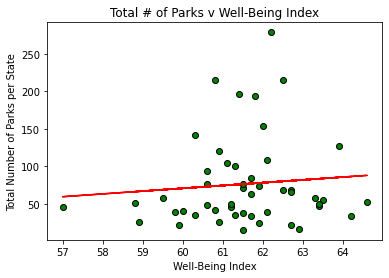

In [13]:
# Linear Regression Fx 1

equation = linregress(merge_df["Well-Being Index"], merge_df['Total Number of Parks'])
(slope, intercept, rvalue, pvalue, stderr) = equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = merge_df["Well-Being Index"] * slope + intercept

# Geting Coeff & r2
correlation = st.pearsonr(merge_df["Well-Being Index"], merge_df['Total Number of Parks'])
print(f"The r-squared is: {rvalue**2}")
print(f"The correlation between the Total Number of Parks per State and the Well-Being Index is {round(correlation[0],2)}")

# Formatting 
plt.scatter(merge_df["Well-Being Index"], merge_df['Total Number of Parks'], facecolor="green", edgecolor="black")
# plt.annotate(equation,(5.8,0.8),fontsize=15)
plt.plot(merge_df["Well-Being Index"],regress_values,"r-")
plt.xlabel("Well-Being Index")
plt.ylabel("Total Number of Parks per State")
plt.title("Total # of Parks v Well-Being Index")
plt.savefig("../Images/Parks_WellBeing_Scatterplot_LR")
plt.show()

The r-squared is: 0.1753457658797368
The correlation between Gallup's Well-Being Rank and Playground's Park Coverage Rank is 0.42


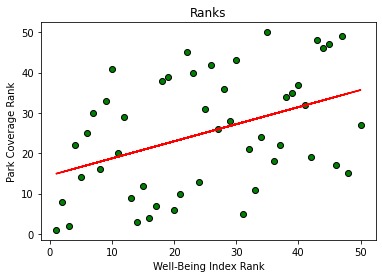

In [14]:
# Linear Regression Fx 2

equation = linregress(merge_df["Well-Being Index Rank"], merge_df["Park Coverage Rank"])
(slope, intercept, rvalue, pvalue, stderr) = equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = merge_df["Well-Being Index Rank"] * slope + intercept

# Getting Coeff & r2
correlation= st.pearsonr(merge_df["Well-Being Index Rank"], merge_df["Park Coverage Rank"])
print(f"The r-squared is: {rvalue**2}")
print(f"The correlation between Gallup's Well-Being Rank and Playground's Park Coverage Rank is {round(correlation[0],2)}")

# FORMATTING
plt.scatter(merge_df["Well-Being Index Rank"], merge_df["Park Coverage Rank"], facecolor="green", edgecolor="black")
# plt.annotate(equation,(5.8,0.8),fontsize=15)
plt.plot(merge_df["Well-Being Index Rank"],regress_values,"r-")
plt.xlabel("Well-Being Index Rank")
plt.ylabel("Park Coverage Rank")
plt.title("Ranks")
plt.savefig("../Images/Ranks_Scatterplot")
plt.show()